In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import bs4
import urllib
import urllib.request
import time
from bs4 import BeautifulSoup
import lxml
import html5lib
import requests
import warnings
import json
import pandas as pd
import datetime

In [2]:
warnings.filterwarnings('ignore')

chrome_options = Options()
chrome_options.add_argument("--window-size=1920,1080")
driver = webdriver.Chrome(executable_path='chromedriver_88.exe', options=chrome_options)

url = f'https://www.google.com/search?q=auto&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjQ14-07vbuAhXJGrkGHaIzB7oQ_AUoAXoECAsQAw&biw=1907&bih=951'
driver.get(url)

In [3]:
def get_pictures_from_google_images(word_searched, waiting_time=3, number_pictures=10 ):
    
    try:
        search_bar = driver.find_element_by_css_selector('input.gLFyf')
    except:
        search_bar = driver.find_element_by_css_selector('input.JSAgYe')
    

    search_bar.clear()
    search_bar.send_keys(word_searched)
    search_bar.send_keys(Keys.ENTER)

    html = driver.find_element_by_tag_name('html')

    for i in range(300):
        html.send_keys(Keys.DOWN)
#     driver.find_element_by_xpath('//*[@id="islmp"]//*/input').click()
#     for i in range(300):
#         html.send_keys(Keys.DOWN)

    small_imgs_lists = driver.find_elements_by_css_selector('img.rg_i')
    links = []
    for i in range(number_pictures):
        try:
            small_imag = small_imgs_lists[i]
            small_imag.click()
            time.sleep(waiting_time)
            link = driver.find_elements_by_css_selector('img.n3VNCb')[1].get_attribute('src')
            links.append(link)
        except:
            pass
    links = [x for x in links if 'http' == x[:4]]
    
    return links

In [6]:
pprint

Pretty printing has been turned OFF


In [7]:
lista_busqueda_v1 = ['auto sedan', 'auto suv', 'auto hatchback', 'auto escarabajo', 'camioneta rutal', 'camioneta panel', 'volquete', 
                     'remolcador', 'semi remolque', 'trimoto', 'cuatrimoto', 'mototaxi', 'camioneta furgon', 'pickup 4x2', 'pickup 4x4', 
                     'camioneta station wagon', 'camioneta van', 'omnibus', 'minibus', 'microbus', 'motocicleta', 'camion cama baja', 
                     'camion furgon', 'llanta faltante', 'llanta pinchada', 'bote peru', 'vehiculos pista lima', 'camiones lima', 
                     'automovil destrozado', 'automovil volcado', 'camioneta volcada', 'camion volcado', 'camioneta destrozada', 
                     'auto quemado', 'camioneta quemado']

['auto sedan', 'auto suv', 'auto hatchback', 'auto escarabajo', 'camioneta rutal', 'camioneta panel', 'volquete', 'remolcador', 'semi remolque', 'trimoto', 'cuatrimoto', 'mototaxi', 'camioneta furgon', 'pickup 4x2', 'pickup 4x4', 'camioneta station wagon', 'camioneta van', 'omnibus', 'minibus', 'microbus', 'motocicleta', 'camion cama baja', 'camion furgon', 'llanta faltante', 'llanta pinchada', 'bote peru', 'vehiculos pista lima', 'camiones lima', 'automovil destrozado', 'automovil volcado', 'camioneta volcada', 'camion volcado', 'camioneta destrozada', 'auto quemado', 'camioneta quemado']

In [8]:
lista_busqueda = [
    'auto coupe',
    'camioneta todo terreno',
    'auto descapotable',
    'camioneta SUV',
    'camioneta VAN',
    'omnibus',
    'camion remolcador',
    'camion con tolva',
    'camion baranda',
    'camion cisterna',
    'camion semirremolque',
    'camion volquete',
    'semirremolque cisterna',
    'semirremolque plataforma',
    'camion compactador',
    'camion frigorifico',
    'ambulancia peru',
    'camion de bomberos peru',
    'camion concretero peru',
    'bus interprovincial peru',
    'avioneta peru',
    'avion peru',
    'limusina peru',
    'casa rodante peru',
    'tractor peru',
    'cargador frontal',
    'retroexcavadora',
    'motoniveladora',
    'compactador',
    'vehiculos lima',
    'bus metropolitano',
    'taxis de lima'
    'tico lima',
    'auto escarabajo',
    'trafico vehicular peru',
    'auto policial peru'
]

In [9]:
dict_links = {}
for word_searched in lista_busqueda:
    try:
        print(word_searched)
        links_1 = get_pictures_from_google_images(word_searched=word_searched, number_pictures=200, waiting_time=3)
        links_1 = [x for x in links_1]
        dict_links[word_searched] = links_1

        with open(f'imagenes_google_cars.json', 'w') as fp:
            json.dump(dict_links, fp)
        print(f'{word_searched}...... procesado')
    except:
        try:
            links_1 = get_pictures_from_google_images(word_searched=word_searched, number_pictures=100, waiting_time=3)
            links_1 = [x for x in links_1]
            dict_links[word_searched] = links_1

            with open(f'imagenes_google_cars_v2.json', 'w') as fp:
                json.dump(dict_links, fp)
            print(f'{word_searched}...... procesado')

        except:
            pass

auto coupe
auto coupe...... procesado
camioneta todo terreno
camioneta todo terreno...... procesado
auto descapotable
auto descapotable...... procesado
camioneta SUV
camioneta SUV...... procesado
camioneta VAN
camioneta VAN...... procesado
omnibus
omnibus...... procesado
camion remolcador
camion remolcador...... procesado
camion con tolva
camion con tolva...... procesado
camion baranda
camion baranda...... procesado
camion cisterna
camion cisterna...... procesado
camion semirremolque
camion semirremolque...... procesado
camion volquete
camion volquete...... procesado
semirremolque cisterna
semirremolque cisterna...... procesado
semirremolque plataforma
semirremolque plataforma...... procesado
camion compactador
camion compactador...... procesado
camion frigorifico
camion frigorifico...... procesado
ambulancia peru
ambulancia peru...... procesado
camion de bomberos peru
camion de bomberos peru...... procesado
camion concretero peru
camion concretero peru...... procesado
bus interprovinc

In [7]:
print(datetime.datetime.now())

2021-02-19 16:09:23.896657


In [8]:
def scrape_list_of_pictures(lista_busqueda:list=['auto'], number_pictures:int=200, waiting_time:float=3, savefile_name:str='imagenes_extraidas'):
    dict_links = {}
    for word_searched in lista_busqueda:
        
        try:
            print(f'{datetime.datetime.now()} - Palabra Buscada: {word_searched}')
            links_1 = get_pictures_from_google_images(word_searched=word_searched, number_pictures=number_pictures, waiting_time=waiting_time)
            links_1 = [x for x in links_1]
            dict_links[word_searched] = links_1

            with open(f'{savefile_name}.json', 'w') as fp:
                json.dump(dict_links, fp)
            print(f'{word_searched}...... procesado')
        except:
            try:
                links_1 = get_pictures_from_google_images(word_searched=word_searched, number_pictures=100, waiting_time=3)
                links_1 = [x for x in links_1]
                dict_links[word_searched] = links_1

                with open(f'{savefile_name}.json', 'w') as fp:
                    json.dump(dict_links, fp)
                print(f'{word_searched}...... procesado\n')

            except:
                pass
    return dict_links

In [227]:
emociones = ['rostro alegre',
'rostro de enfado',
'rostro de miedo',
'rostro triste',
'persona sorprendida',
'mirada de asco',
'persona con confianza',
'persona con interés',
'persona con verguenza',
'persona con culpa',
'persona con bochorno',
'persona satisfecha',
'mirada de desprecio',
'mirada entusiasta',
'mirada complaciente',
'mirada orgullosa',
'mirada de placer'
]

In [228]:
scrape_list_of_pictures(lista_busqueda=emociones, number_pictures=200, waiting_time=3, savefile_name='rostros_emociones')

2021-02-19 08:07:09.128512 - Palabra Buscada: rostro alegre
rostro alegre...... procesado
2021-02-19 08:18:04.354611 - Palabra Buscada: rostro de enfado
rostro de enfado...... procesado
2021-02-19 08:28:55.304612 - Palabra Buscada: rostro de miedo
rostro de miedo...... procesado
2021-02-19 08:39:49.315591 - Palabra Buscada: rostro triste
rostro triste...... procesado
2021-02-19 08:50:35.506825 - Palabra Buscada: persona sorprendida
persona sorprendida...... procesado
2021-02-19 09:01:04.862264 - Palabra Buscada: mirada de asco
mirada de asco...... procesado
2021-02-19 09:11:29.481925 - Palabra Buscada: persona con confianza
persona con confianza...... procesado
2021-02-19 09:21:58.699637 - Palabra Buscada: persona con interés
2021-02-19 09:25:40.242549 - Palabra Buscada: persona con verguenza
2021-02-19 09:29:18.461959 - Palabra Buscada: persona con culpa
2021-02-19 09:32:56.479969 - Palabra Buscada: persona con bochorno
2021-02-19 09:36:34.726218 - Palabra Buscada: persona satisfecha


{'rostro alegre': ['https://www.tuiris.com/wp-content/uploads/2017/11/Alegr%C3%ADa-e1510592311467.jpg',
  'https://i.pinimg.com/originals/62/ac/e1/62ace15a2d5042b72e1d6150551eef12.jpg',
  'https://previews.123rf.com/images/kho/kho1212/kho121200087/16694229-belleza-mujer-ni%C3%B1a-hermosa-adolescente-alegre-rostro-femenino-atractivo-feliz-sonriendo-y-mirando-a-la-.jpg',
  'https://www.reflexiones.cristianas.com/wp-content/uploads/2014/02/7327el-corazon-alegre-hermosea-el-rostro2.jpg',
  'https://image.freepik.com/foto-gratis/emociones-positivas-expresiones-faciales-concepto-felicidad-hombre-alegre-rostro-ovalado_273609-8645.jpg',
  'https://thumbs.dreamstime.com/z/cara-alegre-feliz-de-la-mujer-19045600.jpg',
  'https://previews.123rf.com/images/mangostar/mangostar1701/mangostar170100551/70150536-alegre-empresaria-asi%C3%A1tica-tocando-su-rostro.jpg',
  'https://c8.alamy.com/compes/bxnnbm/retrato-de-rostro-de-mujer-alegre-ambiente-otonal-bxnnbm.jpg',
  'https://gcdn.emol.cl/coaching/file

In [10]:
danhos_adicionales = [
    'Auto sin retrovisor',
    'auto oxidado',
    'auto con espejo faltante',
    'auto con espejo dañado',
    'auto con hendidura grave',
    'auto con parachoques dañado leve',
    'auto con llanta desinflada',
    'auto con llanta robada',
    'auto con líquido derramado',
    'vidrio de auto roto',
    'retrovisor faltante',
    'auto con aros dañados',
    'faro de auto roto',
    'auto con la rejilla robada',
    'auto con piezas robadas'
]

In [11]:
dict_danhos_adicionales = scrape_list_of_pictures(lista_busqueda=danhos_adicionales, number_pictures=150, waiting_time=3, savefile_name='danos_extra_cars')

2021-02-19 17:10:21.300232 - Palabra Buscada: Auto sin retrovisor
Auto sin retrovisor...... procesado
2021-02-19 17:18:17.865897 - Palabra Buscada: auto oxidado
auto oxidado...... procesado
2021-02-19 17:26:20.944099 - Palabra Buscada: auto con espejo faltante
auto con espejo faltante...... procesado
2021-02-19 17:30:00.670547 - Palabra Buscada: auto con espejo dañado
auto con espejo dañado...... procesado
2021-02-19 17:37:57.006346 - Palabra Buscada: auto con hendidura grave
auto con hendidura grave...... procesado
2021-02-19 17:39:16.585300 - Palabra Buscada: auto con parachoques dañado leve
auto con parachoques dañado leve...... procesado
2021-02-19 17:43:17.818569 - Palabra Buscada: auto con llanta desinflada
auto con llanta desinflada...... procesado
2021-02-19 17:51:13.137835 - Palabra Buscada: auto con llanta robada
auto con llanta robada...... procesado
2021-02-19 17:59:12.961976 - Palabra Buscada: auto con líquido derramado
auto con líquido derramado...... procesado
2021-02-19

In [234]:
dict_danhos_adicionales

{}

https://www.toyotaperu.com.pe/sites/default/files/CorollaHybrid-blanco_4.png
https://fotos.perfil.com/2020/10/02/trim/1280/720/toyota-corolla-gr-sport-1053648.jpg
https://s3.amazonaws.com/wp.prod.neoauto.pe/noticias/wp-content/uploads/2020/06/30222915/toyota-corolla-2021-lanzamiento-peru.jpg

https://i.ytimg.com/vi/GKev2DWcDL8/maxresdefault.jpg
https://cnet4.cbsistatic.com/img/UJ3mxFRgZCL_5PyM5iJSM-p0WWc=/2019/07/17/e6640571-f94c-47d6-b026-a69dec844b29/toyota-corolla-2020.jpg
https://acs2.blob.core.windows.net/imgcatalogo/xl/VA_efb2f80f9a764a878852f620cf870871.jpg
https://upload.wikimedia.org/wikipedia/commons/f/f1/2018_Toyota_Corolla_%28MZEA12R%29_Ascent_Sport_hatchback_%282018-11-02%29_01.jpg
https://lh3.googleusercontent.com/proxy/2aWpc5XArjWkU0h8NPufXm5xN26_IJYb46yI_dkSV-TxkTUm-F8QVw4nBfMIzanntc8f17LKfJPvpNmKGINehf7j4bdUiAHRXPXTQya5IaiYFb786j2fBY4DJmgMt6M3jQodO8ieSiE44y_tccp76Q

https://www.toyotaperu.com.pe/sites/default/files/CorollaHybrid-negro_0.png
https://www.rutamotor.com/wp
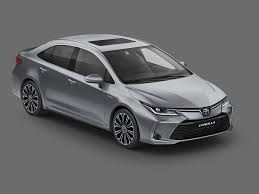
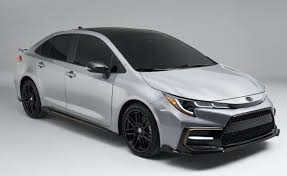
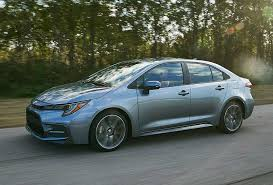

In [124]:
dict_links = {}
for word_searched in ['toyota corolla', 'nissan sunny']:
    
    try:
        search_bar = driver.find_element_by_css_selector('input.gLFyf')
    except:
        search_bar = driver.find_element_by_css_selector('input.JSAgYe')
    
    html = driver.find_element_by_tag_name('html')

    search_bar.clear()
    search_bar.send_keys(word_searched)
    search_bar.send_keys(Keys.ENTER)

    for i in range(300):
        html.send_keys(Keys.DOWN)
#     driver.find_element_by_xpath('//*[@id="islmp"]//*/input').click()
#     for i in range(300):
#         html.send_keys(Keys.DOWN)

    small_imgs_lists = driver.find_elements_by_css_selector('img.rg_i')
    links = []
    for small_imag in small_imgs_lists:
        try:
            small_imag.click()
            time.sleep(3)
            link = driver.find_elements_by_css_selector('img.n3VNCb')[1].get_attribute('src')
            links.append(link)
        except:
            pass
    links = [x for x in links if 'http' == x[:4]]
    
    dict_links[word_searched] = links

In [168]:
## Para colectar mucha más información

for i in range(300):
    html.send_keys(Keys.DOWN)
aa = driver.find_element_by_xpath('//*[@id="islmp"]//*/input')
aa.click()
for i in range(300):
    html.send_keys(Keys.DOWN)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27


https://www.toyotaperu.com.pe/sites/default/files/CorollaHybrid-blanco_4.png
https://fotos.perfil.com/2020/10/02/trim/1280/720/toyota-corolla-gr-sport-1053648.jpg
https://s3.amazonaws.com/wp.prod.neoauto.pe/noticias/wp-content/uploads/2020/06/30222915/toyota-corolla-2021-lanzamiento-peru.jpg

https://i.ytimg.com/vi/GKev2DWcDL8/maxresdefault.jpg
https://cnet4.cbsistatic.com/img/UJ3mxFRgZCL_5PyM5iJSM-p0WWc=/2019/07/17/e6640571-f94c-47d6-b026-a69dec844b29/toyota-corolla-2020.jpg
https://acs2.blob.core.windows.net/imgcatalogo/xl/VA_efb2f80f9a764a878852f620cf870871.jpg
https://upload.wikimedia.org/wikipedia/commons/f/f1/2018_Toyota_Corolla_%28MZEA12R%29_Ascent_Sport_hatchback_%282018-11-02%29_01.jpg

https://lh3.googleusercontent.com/proxy/2aWpc5XArjWkU0h8NPufXm5xN26_IJYb46yI_dkSV-TxkTUm-F8QVw4nBfMIzanntc8f17LKfJPvpNmKGINehf7j4bdUiAHRXPXTQya5IaiYFb786j2fBY4DJmgMt6M3jQodO8ieSiE44y_tccp76Q
https://www.toyotaperu.com.pe/sites/default/files/CorollaHybrid-negro_0.png
https://www.rutamotor.com/w
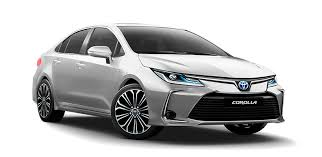
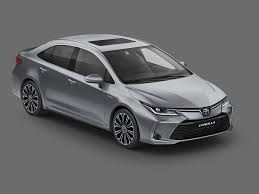
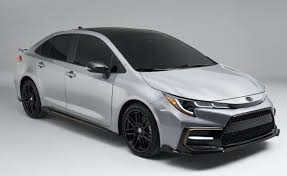
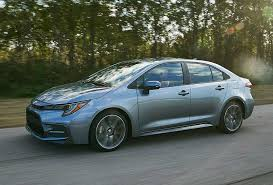

In [172]:
    links = []
    for small_imag in small_imgs_lists:
        try:
            small_imag.click()
            time.sleep(3)
            link = driver.find_elements_by_css_selector('img.n3VNCb')[1].get_attribute('src')
            print(link)
            links.append(link)
        except:
            pass
    links = [x for x in links if 'http' == x[:4]]

In [175]:
links

['https://www.toyotaperu.com.pe/sites/default/files/CorollaHybrid-blanco_4.png',
 'https://fotos.perfil.com/2020/10/02/trim/1280/720/toyota-corolla-gr-sport-1053648.jpg',
 'https://s3.amazonaws.com/wp.prod.neoauto.pe/noticias/wp-content/uploads/2020/06/30222915/toyota-corolla-2021-lanzamiento-peru.jpg',
 'https://i.ytimg.com/vi/GKev2DWcDL8/maxresdefault.jpg',
 'https://cnet4.cbsistatic.com/img/UJ3mxFRgZCL_5PyM5iJSM-p0WWc=/2019/07/17/e6640571-f94c-47d6-b026-a69dec844b29/toyota-corolla-2020.jpg',
 'https://acs2.blob.core.windows.net/imgcatalogo/xl/VA_efb2f80f9a764a878852f620cf870871.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/f/f1/2018_Toyota_Corolla_%28MZEA12R%29_Ascent_Sport_hatchback_%282018-11-02%29_01.jpg',
 'https://lh3.googleusercontent.com/proxy/2aWpc5XArjWkU0h8NPufXm5xN26_IJYb46yI_dkSV-TxkTUm-F8QVw4nBfMIzanntc8f17LKfJPvpNmKGINehf7j4bdUiAHRXPXTQya5IaiYFb786j2fBY4DJmgMt6M3jQodO8ieSiE44y_tccp76Q',
 'https://www.toyotaperu.com.pe/sites/default/files/CorollaHybrid-negro_0.

## Recuperar imágenes de Google Imagenes (solo snippets pequeños)

In [176]:
def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query
    search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [192]:
links_1 = fetch_image_urls(query='motito peruana en cusco', max_links_to_fetch=200, wd=driver, sleep_between_interactions=0.2)

Found: 100 search results. Extracting links from 0:100
Found: 85 image links, looking for more ...


In [189]:
dict_links = {}
for word_searched in ['hatchback','pick up', 'peru','llanta dañada']:
    print(word_searched)
    links_1 = fetch_image_urls(query=word_searched, max_links_to_fetch=100, wd=driver, sleep_between_interactions=3)
    links_1 = [x for x in links_1]
    dict_links[word_searched] = links_1
    


hatchback
Found: 100 search results. Extracting links from 0:100
Found: 10 image links, done!
pick up
Found: 100 search results. Extracting links from 0:100
Found: 10 image links, done!
peru
Found: 100 search results. Extracting links from 0:100
Found: 10 image links, done!
llanta dañada
Found: 100 search results. Extracting links from 0:100
Found: 10 image links, done!


In [191]:
    with open(f'imagenes_google_cars.json', 'w') as fp:
        json.dump(dict_links, fp)

['https://www.toyotaperu.com.pe/sites/default/files/360/yarishb_blanco040_03.jpg',
 'https://www.carroya.com/noticias/sites/default/files/kia-hatchback.jpg',
 'http://cdn2.dineroenimagen.com/media/dinero/styles/xlarge/public/images/2018/11/sedan-hatchback-diferencia.jpg']